<a href="https://colab.research.google.com/github/virf96/Proyectos/blob/master/Importando_datos_de_Yahoo_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Yahoo Finance
Si quieres tener los datos de precios de índices actualizados a día de hoy, lo puedes hacer de la siguiente manera. Estos datos han sido obtenidos mediante [Yahoo Finance](https://es.finance.yahoo.com/), una plataforma donde puedes ver, obtener, estudiar, analizar y comparar los precios de cierre de diferentes de acciones de los mercados financieros. La forma de obtener los datos de Yahoo Finance en Python es mediante el paquete `yfinance` que tendremos que instalar e importar.


In [1]:
!pip install yfinance
import yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=703ec4fbd95a789cda7cb839fb05e67cedbb19e9ad608ed52820773ed4463653
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


Para obtener los precios de cierre de los índices SP500, FTSE, DAX y NIKKEI, especificar los nombres, la fecha de inicio y fin, y el intervalo (diario=1d):

In [2]:
raw_data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", start = "1994-01-07", 
                              end = "2020-05-17", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)

[*********************100%***********************]  4 of 4 completed


In [3]:
raw_data.tail()

^GDAXI                ...        ^FTSE              
                    Open          High  ...        Close        Volume
Date                                    ...                           
2020-05-11  10948.240234  10986.219727  ...  5939.700195  1.041394e+09
2020-05-12  10777.740234  10886.009766  ...  5994.799805  9.397677e+08
2020-05-13  10669.990234  10698.129883  ...  5904.100098  1.055706e+09
2020-05-14  10418.040039  10474.080078  ...  5741.500000  1.152460e+09
2020-05-15  10470.849609  10547.190430  ...  5799.799805  9.274333e+08

[5 rows x 20 columns]

In [4]:
#Copiamos la tabla en caso de querer utilizar la tabla sin transformaciones en otro momento
df_comp=raw_data.copy()

Para cada día y cada precio obtenemos 4 datos, los precios de: apertura, máximo, bajo, cierre y volumen. Queremos los precios de cierre así que seleccionamos sólo la variable cierre para cada precio, los guardamos en 4 nuevas variables en el dataset y les ponemos los nombres del indice al que corresponden.

In [5]:
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['dax'] = df_comp['^GDAXI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]

In [6]:
df_comp.head()

^GDAXI               ...         ftse        nikkei
                   Open         High  ...                           
Date                                  ...                           
1994-01-07  2218.959961  2227.639893  ...  3446.000000  18124.009766
1994-01-10  2231.840088  2238.010010  ...  3440.600098  18443.439453
1994-01-11  2225.429932  2235.610107  ...  3413.800049  18485.250000
1994-01-12  2227.120117  2227.790039  ...  3372.000000  18793.880859
1994-01-13  2171.500000  2183.709961  ...  3360.000000  18577.259766

[5 rows x 24 columns]

In [7]:
df_comp.tail()

^GDAXI                ...         ftse        nikkei
                    Open          High  ...                           
Date                                    ...                           
2020-05-11  10948.240234  10986.219727  ...  5939.700195  20390.660156
2020-05-12  10777.740234  10886.009766  ...  5994.799805  20366.480469
2020-05-13  10669.990234  10698.129883  ...  5904.100098  20267.050781
2020-05-14  10418.040039  10474.080078  ...  5741.500000  19914.779297
2020-05-15  10470.849609  10547.190430  ...  5799.799805  20037.470703

[5 rows x 24 columns]

Pre-procesado: eliminar las variables que sobran, arreglar la frecuencia a business days y rellenar datos faltantes.

In [11]:
#Sleccionamos la primera hasta la última fila
df_comp = df_comp.iloc[1:]
#Nos quedamos unicamente con los precios de los indicadores
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
#Frecuencia de días "business days"
df_comp=df_comp.asfreq('b')
#Relleno de datos faltantes con front filling
#releno frontal en el cuál le asigna el periodo posterior a la fecha faltante
df_comp=df_comp.fillna(method='ffill')

In [12]:
df_comp.head()

,spx,dax,ftse,nikkei
,,,,
Date,,,,
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859
1994-01-13,472.470001,2142.370117,3360.000000,18577.259766
1994-01-14,474.910004,2151.050049,3400.600098,18973.699219


<function matplotlib.pyplot.show>

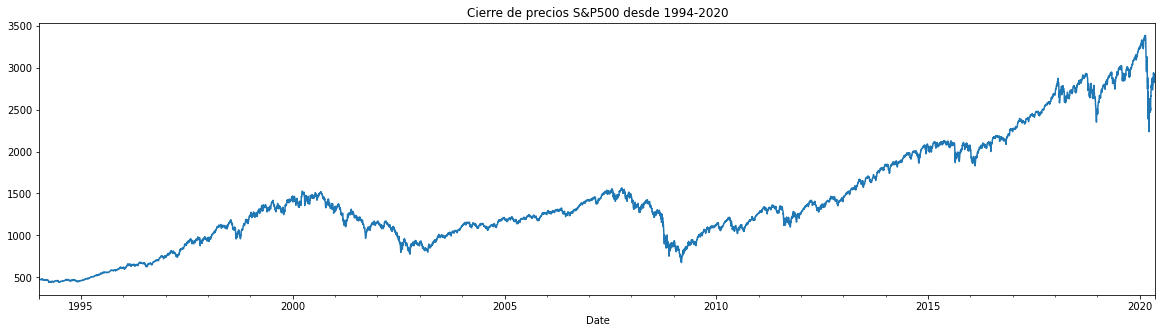

In [16]:
import matplotlib.pyplot as plt
df_comp.spx.plot(figsize=(20,5), title = "Cierre de precios S&P500 desde 1994-2020")
plt.show

<function matplotlib.pyplot.show>

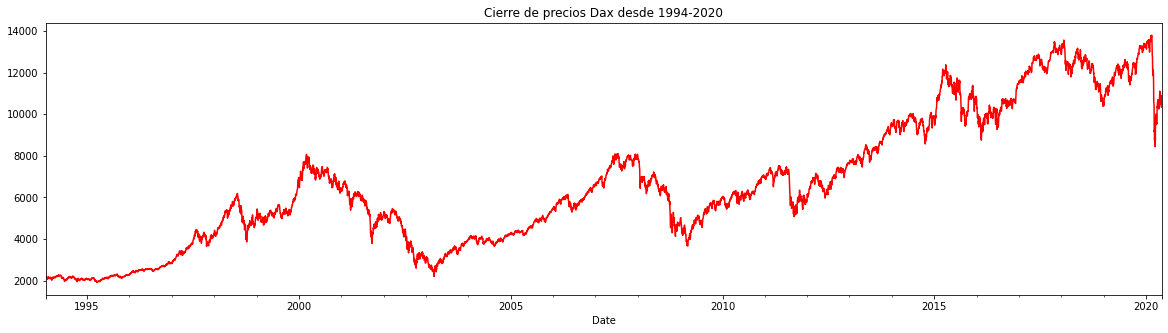

In [17]:
df_comp.dax.plot(figsize=(20,5), title = "Cierre de precios Dax desde 1994-2020",color='red')
plt.show

<function matplotlib.pyplot.show>

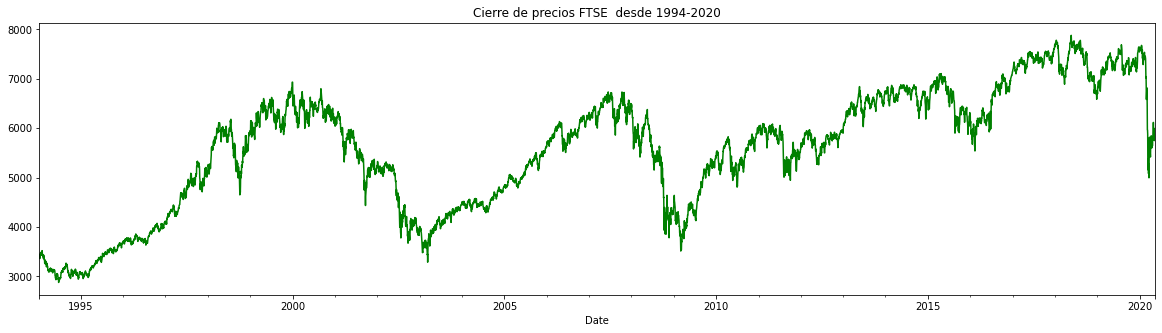

In [18]:
df_comp.ftse.plot(figsize=(20,5), title = "Cierre de precios FTSE  desde 1994-2020",color='green')
plt.show

<function matplotlib.pyplot.show>

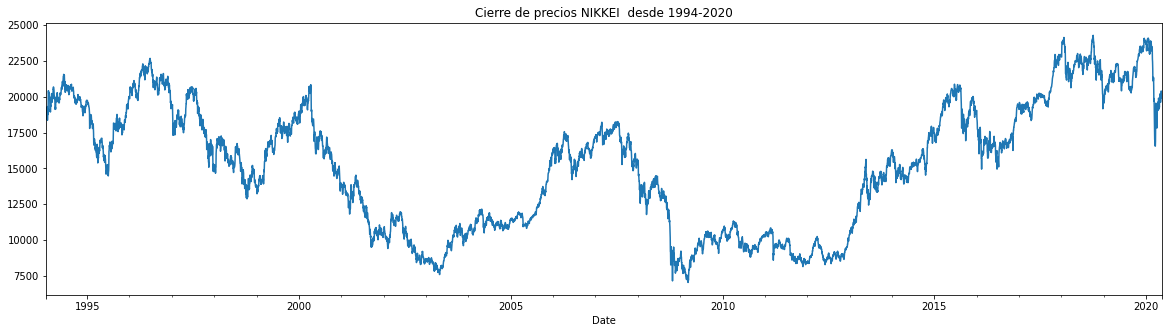

In [19]:
df_comp.nikkei.plot(figsize=(20,5), title = "Cierre de precios NIKKEI  desde 1994-2020")
plt.show

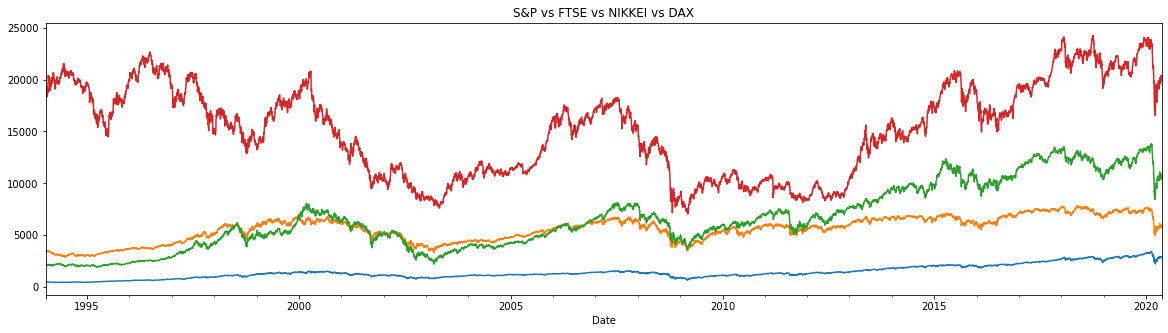

In [20]:
#Para poder compararlas habría que escalarlas, el gráfico aún es engañoso dado que aún estan en diferentes magnitudes.
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
df_comp.ftse.plot(figsize=(20,5), title = "FTSE100 Prices")
df_comp.dax.plot(figsize=(20,5), title = "DAX Prices")
df_comp.nikkei.plot(figsize=(20,5), title = "NIKKEI Prices")
plt.title("S&P vs FTSE vs NIKKEI vs DAX")
plt.show()
